# CLUSTER SUBMISSION
In this notebook we are going to study the outcome csv file obtained with the IIIA's cluster.

## 1. READ DATA FROM THE CLUSTER SUBMISSION

Every file contains 2 simulations ran with N = 100 agents and T = 4320 hours (4 mesos). There is M = 100 different simulations for each configuration of the norms. Using pandas library we explore the content of the file. 

In [32]:
import pandas as pd
datasets = []
# Iterate over the range from 0 to 10 (exclusive) to read and append each file
for i in range(10):
    filename = f"C:/Users/albaa/Escriptori/MasterModelitzacio/JAE/pythonmesa/resultatssimulacionscluster/results{i}.csv"
    dataset = pd.read_csv(filename, delimiter=";")
    datasets.append(dataset)
cluster = pd.concat(datasets)
cluster.reset_index(drop=True, inplace=True)
cluster

,RunId,iteration,Step,name,N,norms_ind,AgentID,position,physiological,safety,belonging,esteem,wealth,actions,status
0,0,0,4320,Barcelona,100,(),0,"(0, 0)","[1.0, 0.95, 1.0, 1.0]","[1.0, 0.999, 0.9992, 1.0]","[1.0, 0.85, 0.98]","[1.0, 0.99, 0.98]",12846.783333,go_grocery,employed
1,0,0,4320,Barcelona,100,(),1,"(0, 0)","[1.0, 0.95, 0.9399225867669575, 1.0]","[1.0, 0.999, 0.9992, 1.0]","[1.0, 0.85, 0.98]","[1.0, 0.99, 0.98]",9050.033333,go_grocery,employed
2,0,0,4320,Barcelona,100,(),2,"(0, 1)","[1.0, 0.9025, 0.9, 1.0]","[1.0, 0.998001, 0.99840064, 1.0]","[1.0, 0.7224999999999999, 0.9603999999999999]","[1.0, 0.9801, 0.9603999999999999]",5735.325000,go_home,employed
3,0,0,4320,Barcelona,100,(),3,"(2, 0)","[0.8246062499999999, 1.0, 1.0, 0.5696784524146...","[1.0, 1.0, 1.0, 0.994011992]","[0.7682000000000001, 1.0, 1.0]","[1.0, 1.0, 1.0]",2637.675000,go_grocery,retired
4,0,0,4320,Barcelona,100,(),4,"(2, 0)","[0.8246062499999999, 1.0, 0.9, 0.5697376119310...","[1.0, 1.0, 1.0, 0.994011992]","[0.7682000000000001, 1.0, 1.0]","[1.0, 1.0, 1.0]",2024.450000,go_grocery,retired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,63,0,4320,Barcelona,100,"(0, 1, 2, 3, 4, 5)",95,"(0, 2)","[0.9299999999999999, 1.0, 0.9354254521175394, ...","[1.0, 1.0, 1.0, 0.998]","[0.905, 1.0, 1.0]","[1.0, 1.0, 1.0]",1911.025000,go_home,retired
63996,63,0,4320,Barcelona,100,"(0, 1, 2, 3, 4, 5)",96,"(1, 1)","[2.4912028575060515e-05, 1.6254648751540738e-3...","[0.893381815335852, 0.44735524511437874, 1.0, ...","[0.003327388193208182, 0.0, 1.0]","[0.21678688048868958, 0.0, 1.0]",0.000000,go_reception_center,homeless
63997,63,0,4320,Barcelona,100,"(0, 1, 2, 3, 4, 5)",97,"(0, 2)","[1.0, 0.92, 0.9913400745316852, 0.706658607305...","[1.0, 0.995, 0.999, 1.0]","[1.0, 0.97, 0.98]","[1.0, 0.99, 0.99]",2871.575000,go_grocery,retired
63998,63,0,4320,Barcelona,100,"(0, 1, 2, 3, 4, 5)",98,"(1, 1)","[4.960529146794419e-24, 1.6216032796276898e-25...","[0.6349009650426775, 0.5855125400671733, 1.0, ...","[6.197879784800848e-12, 0.0, 1.0]","[0.04269419922295769, 0.0, 1.0]",0.000000,go_reception_center,homeless


We can join all of our data in a unique dataset so the statistic analysis contains all the information. We can also erase some columns we are not interested in, and locate a particular configuration of norms, like the void subset. Below we can see how many combinations of norms we have.

In [13]:
#cluster = cluster.drop(['iteration', 'name', 'Step', 'position'], axis= 1)
#len(cluster.loc[cluster['norms_ind'] == '()'])
len(pd.unique(cluster['norms_ind'])) 
#cluster.loc[cluster['status'] == 'homeless']
#pd.unique(cluster['Step'])

64

Next step will be to plot the wealth distributions corresponding to individual configurations of norms. We use a rug plot to highlight the homeless wealth.

Now we are going to visualize collective subsets of norms. Concretely, the Apo and non-Apo subsets separadetly: 
- (2, 3, 4, 5, 6): paying fines when commiting minor crimes and sleeping in the street and going to prison if broke. 
- (1, 7, 8 ): Unemployment benefits, Minimal vital income and Dignified living space. 

### GINI COEFFICIENT
In economics, the Gini coefficient is a measure of statistical dispersion intended to represent the income inequality, the wealth inequality, or the consumption inequality within a nation or a social group. It was developed by statistician and sociologist Corrado Gini.
The Gini coefficient measures the inequality among the values of a frequency distribution, such as levels of income. A Gini coefficient of 0 reflects perfect equality, where all income or wealth values are the same, while a Gini coefficient of 1 (or 100%) reflects maximal inequality among values, for example a single individual having all the income while all others have none.

We can obtain G it by plotting the Lorenz curve (cummulative wealth distribution: share of owned income by each decile of agents) and computing the area between the curve and the perfect line of equality. The final task would be to compute the proportion of this area.  

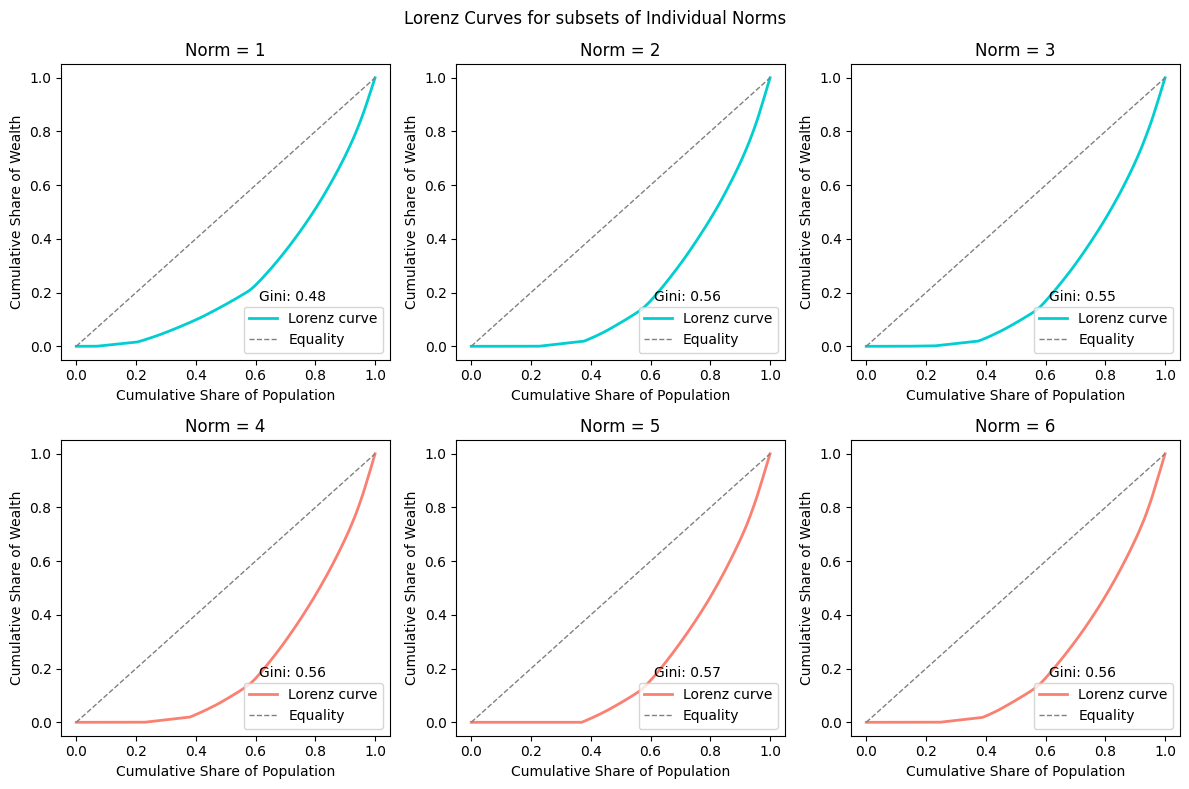

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#CURBA DE LORENTZ AND LINE OF EQUALITY
desired_order = [ '(0,)', '(1,)', '(5,)', '(2,)', '(3,)', '(4,)']
combination_labels = [ '1', '2', '3', '4', '5', '6']

filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

# Create a grid of subplots to display the wealth distributions
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
colors = plt.cm.Set1(np.linspace(0, 1, len(desired_order)))

gini_coefficients = []
colors = ['darkturquoise', 'darkturquoise', 'darkturquoise', 'salmon', 'salmon', 'salmon']  #'salmon', 'darkturquoise']   #plt.cm.Set1(np.linspace(0, 1, len(desired_order)))

# Iterate over the desired combinations and plot the Lorenz curve for each
for i, combination in enumerate(desired_order):
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    row = i // 3
    col = i % 3
    
    # Compute cumulative wealth distribution
    wealth_values = np.sort(filtered_data['wealth'])
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    # Calculate Gini coefficient
    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    gini_coefficients.append(gini_coefficient)

    # Plot the Lorenz curve
    axs[row, col].plot(np.linspace(0, 1, n), cumulative_percentage, linewidth=2, label='Lorenz curve', color = colors[i])
    axs[row, col].plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label='Equality')
    
    axs[row, col].set_xlabel('Cumulative Share of Population')
    axs[row, col].set_ylabel('Cumulative Share of Wealth')
    axs[row, col].set_title(f'Norm = {combination_labels[i]}')
    axs[row, col].text(0.6, 0.2, f'Gini: {gini_coefficient:.2f}', transform=axs[row, col].transAxes)
    axs[row, col].legend(loc='lower right')
    
fig.suptitle('Lorenz Curves for subsets of Individual Norms')
plt.tight_layout()
plt.show()


## Baseline simulation distribution and Gini

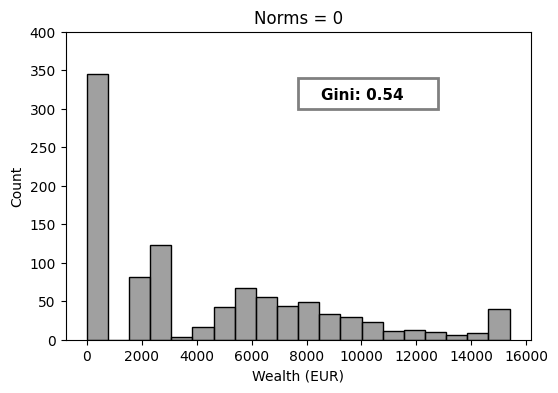

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

desired_order = ['()']
combination_labels = ['0']

filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

# Create a grid of subplots to display the wealth distributions
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
colors = ['grey']

gini_coefficients = []

# Iterate over the desired combinations and plot the wealth distribution for each
for i, combination in enumerate(desired_order[:1]):
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    
    # Compute cumulative wealth distribution
    wealth_values = np.sort(filtered_data['wealth'])
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    # Calculate Gini coefficient
    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    gini_coefficients.append(gini_coefficient)

    # Plot the distribution of wealth for the current combination with a unique color
    sns.histplot(data=filtered_data, x='wealth', bins=20, color=colors[i], ax=axs)
    homeless_wealth = filtered_data[filtered_data['status'] == 'homeless']['wealth']
    
    # Plot the colored square with Gini coefficient text
    axs.text(0.55, 0.78, f'Gini: {gini_coefficient:.2f}', weight='bold', fontsize=11, transform=axs.transAxes)
    square_color = colors[i]
    frame = plt.Rectangle((0.5, 0.75), 0.3, 0.10, fill=False, edgecolor=square_color, linewidth=2, transform=axs.transAxes)
    axs.add_patch(frame)
    
    axs.set_xlabel('Wealth (EUR)')
    axs.set_ylabel('Count')
    axs.set_ylim(0, 400)
    axs.set_title(f'Norms = {combination_labels[i]}')

plt.show()


## Individual effect of the norms on the simulation

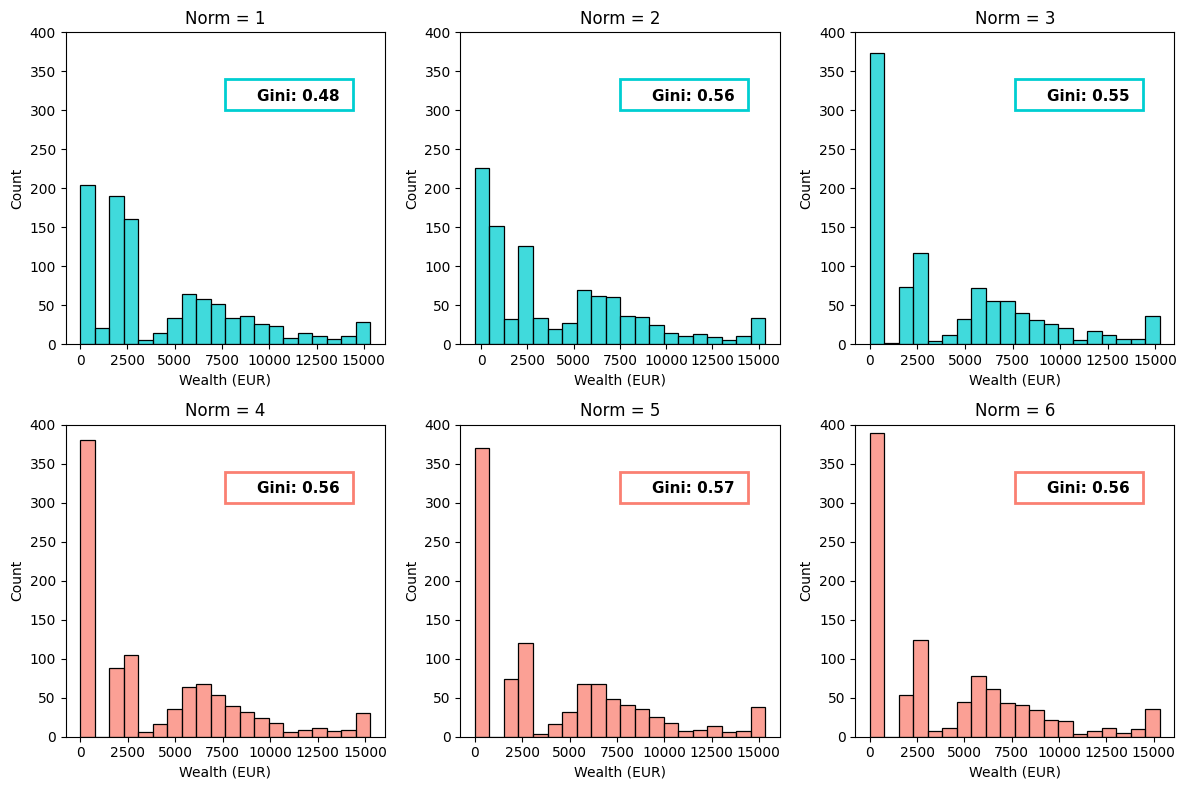

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

desired_order = [ '(0,)', '(1,)', '(5,)' ,'(2,)', '(3,)', '(4,)'] #'()',
combination_labels = ['1', '2', '3', '4', '5', '6','7', '8']

filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

# Create a grid of subplots to display the wealth distributions
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
colors = ['darkturquoise', 'darkturquoise', 'darkturquoise', 'salmon', 'salmon', 'salmon']  #'salmon', 'darkturquoise']   #plt.cm.Set1(np.linspace(0, 1, len(desired_order)))

gini_coefficients = []

# Iterate over the desired combinations and plot the wealth distribution for each
for i, combination in enumerate(desired_order[:6]):
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    row = i // 3
    col = i % 3
    
    # Compute cumulative wealth distribution
    wealth_values = np.sort(filtered_data['wealth']) #Order de petit a gran
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    # Calculate Gini coefficient
    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    gini_coefficients.append(gini_coefficient)

    # Plot the distribution of wealth for the current combination with a unique color
    sns.histplot(data=filtered_data, x='wealth', bins=20, color=colors[i], ax=axs[row, col])
    homeless_wealth = filtered_data[filtered_data['status'] == 'homeless']['wealth']
    
    # Plot the rugplot lines for the rest of the wealth distribution in black
    #sns.rugplot(data=filtered_data, x='wealth', color='black', ax=axs[row, col], linewidth=0.5)
    
    # Plot the rugplot line for the wealth values of homeless agents in red and larger size
    #sns.rugplot(data=homeless_wealth, color='red', ax=axs[row, col], linewidth=1.5, height=0.05)
    # Plot the colored square with Gini coefficient text
    axs[row, col].text(0.6, 0.78, f'Gini: {gini_coefficient:.2f}', weight = 'bold', fontsize = 11, transform=axs[row, col].transAxes)
    square_color = colors[i]
    frame = plt.Rectangle((0.5, 0.75), 0.4, 0.10, fill=False, edgecolor=square_color, linewidth=2, transform=axs[row, col].transAxes)
    axs[row, col].add_patch(frame)
    
    axs[row, col].set_xlabel('Wealth (EUR)')
    axs[row, col].set_ylabel('Count')
    axs[row, col].set_ylim(0, 400)
    axs[row, col].set_title(f'Norm = {combination_labels[i]}')
    #axs[row, col].text(0.6, 0.8, f'Gini: {gini_coefficient:.2f}', transform=axs[row, col].transAxes)
    
#fig.suptitle('Wealth Distributions for subsets of Individual Norms')
plt.tight_layout()
plt.show()


## Comparison with the baseline simulation

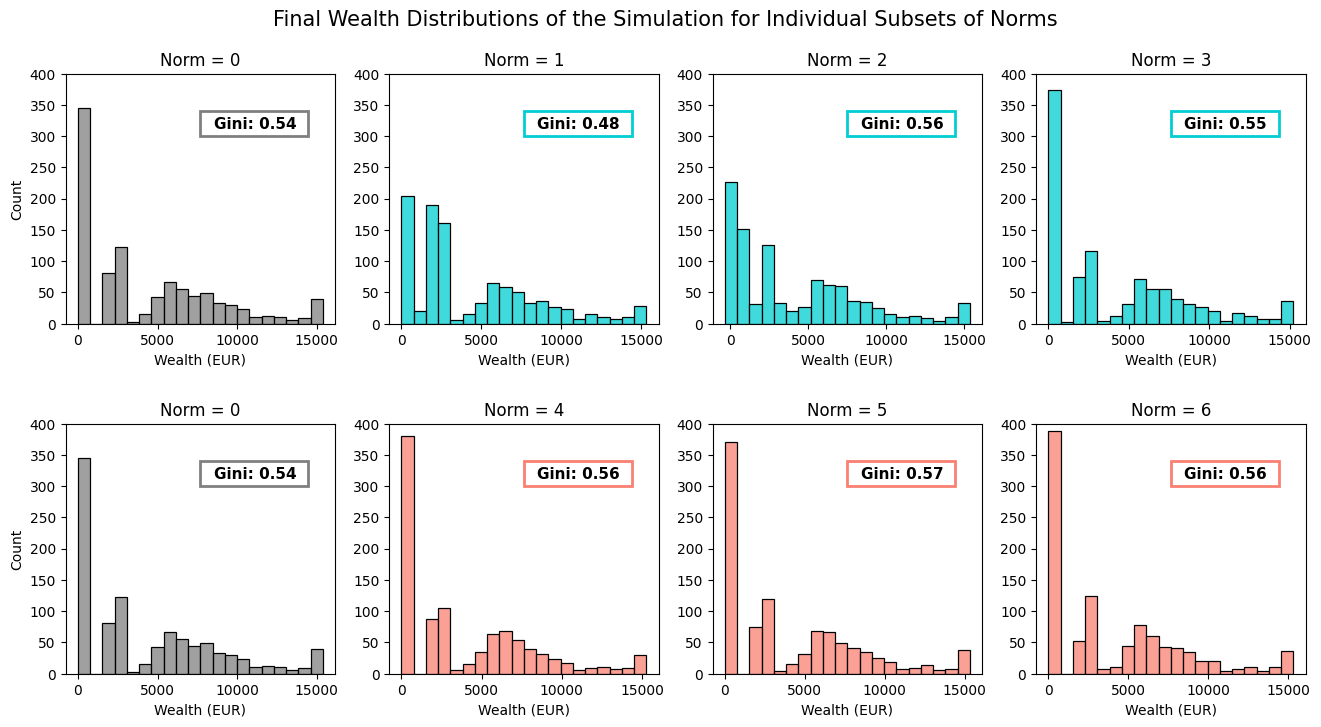

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

desired_order = ['()', '(0,)', '(1,)', '(5,)', '()', '(2,)', '(3,)', '(4,)']
combination_labels = ['0', '1', '2', '3', '0', '4', '5', '6']

filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

# Create a grid of subplots to display the wealth distributions
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
colors = ['grey', 'darkturquoise', 'darkturquoise', 'darkturquoise', 'grey', 'salmon', 'salmon', 'salmon']

gini_coefficients = []

# Iterate over the desired combinations and plot the wealth distribution for each
for i, combination in enumerate(desired_order[:8]):
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    row = i // 4
    col = i % 4
    
    # Compute cumulative wealth distribution
    wealth_values = np.sort(filtered_data['wealth'])
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    # Calculate Gini coefficient
    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    gini_coefficients.append(gini_coefficient)

    # Plot the distribution of wealth for the current combination with a unique color
    sns.histplot(data=filtered_data, x='wealth', bins=20, color=colors[i], ax=axs[row, col])
    homeless_wealth = filtered_data[filtered_data['status'] == 'homeless']['wealth']
    
    # Plot the rugplot lines for the rest of the wealth distribution in black
    #sns.rugplot(data=filtered_data, x='wealth', color='black', ax=axs[row, col], linewidth=0.5)
    
    # Plot the rugplot line for the wealth values of homeless agents in red and larger size
    #sns.rugplot(data=homeless_wealth, color='red', ax=axs[row, col], linewidth=1.5, height=0.05)
    # Plot the colored square with Gini coefficient text
    axs[row, col].text(0.55, 0.78, f'Gini: {gini_coefficient:.2f}', weight='bold', fontsize=11, transform=axs[row, col].transAxes)
    square_color = colors[i]
    frame = plt.Rectangle((0.5, 0.75), 0.4, 0.10, fill=False, edgecolor=square_color, linewidth=2, transform=axs[row, col].transAxes)
    axs[row, col].add_patch(frame)
    
    axs[row, col].set_xlabel('Wealth (EUR)')
    
    if col == 0:
        axs[row, col].set_ylabel('Count')
    else:
        axs[row, col].set_ylabel('')
    
    axs[row, col].set_ylim(0, 400)
    axs[row, col].set_title(f'Norm = {combination_labels[i]}')

# Adjust the spacing between subplots and add extra spacing
plt.subplots_adjust(top=0.85, bottom=0.1, hspace=0.4)

# Add title with extra spacing
fig.suptitle('Final Wealth Distributions of the Simulation for Individual Subsets of Norms', fontsize=15, y=0.93)

plt.show()


## Effect of the Apo and Non-Apo subset of Norms 

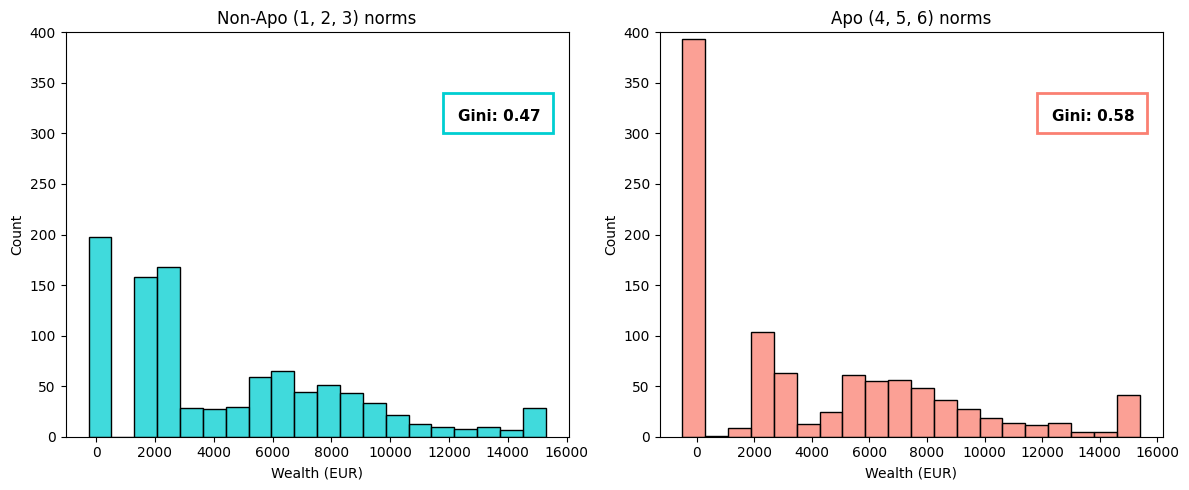

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

desired_order =  ['(0, 1, 5)', '(2, 3, 4)']#['(0, 1, 7)', '(2, 3, 4, 5, 6)']
combination_labels = ['Non-Apo (1, 2, 3)', 'Apo (4, 5, 6)'] #['Non-Apo (1, 2, 8)', 'Apo (3, 4, 5, 6, 7)']
filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

gini_coefficients = []

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
colors = ['darkturquoise', 'salmon']

# Iterate over the desired combinations and plot the wealth distribution for each
for i, combination in enumerate(desired_order):
    # Filter the DataFrame for the current combination
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    homeless_wealth = filtered_data[filtered_data['status'] == 'homeless']['wealth']
    
    # Plot the rugplot line for the wealth values of homeless agents in red and larger size
    #sns.rugplot(data=homeless_wealth, color='red', ax = axs[i],  linewidth=1.5, height=0.05)

    # Compute cumulative wealth distribution
    wealth_values = np.sort(filtered_data['wealth'])
    #wealth_values = np.extract(wealth_values > 1500, wealth_values)   #FILTRANT PER TREURE ELS MOLT BROKE
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    # Calculate Gini coefficient
    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    gini_coefficients.append(gini_coefficient)

    # Plot the distribution of wealth for the current combination with a unique color
    sns.histplot(data=filtered_data, x='wealth', bins=20, color=colors[i], ax=axs[i])
    #sns.rugplot(data=filtered_data, x='wealth', color='black', ax=axs[i])
    axs[i].set_xlabel('Wealth (EUR)')
    axs[i].set_ylabel('Count')
    axs[i].set_ylim(0, 400)
    axs[i].set_title(f'{combination_labels[i]} norms')

    

# Add Gini coefficient labels to the plots
for i, gini_coefficient in enumerate(gini_coefficients):
    axs[i].text(0.78, 0.78, f'Gini: {gini_coefficient:.2f}', fontsize = 11, weight = 'bold', transform=axs[i].transAxes)
    frame = plt.Rectangle((0.75, 0.75), 0.22, 0.10, fill=False, edgecolor=colors[i], linewidth=2, transform=axs[i].transAxes)
    axs[i].add_patch(frame)

# Add a global title to the figure
#fig.suptitle('Wealth Distributions for Apo and Non-Apo Norms')

plt.tight_layout()
plt.show()


### Detection of the agents in the left lowest wealth bar 

In [19]:
#cluster.loc[(cluster['norms_ind'] == '(2, 3, 4)') & (cluster['wealth'] < 2000)]
cluster.loc[(cluster['norms_ind'] == '(0, 1, 5)') & (cluster['wealth'] < 500)]['status'].value_counts() #veig que aqui directament no hi ha homeless, ja son unemployed

unemployed    56
employed       4
Name: status, dtype: int64

In [20]:
#cluster.loc[(cluster['norms_ind'] == '(2, 3, 4)') & (cluster['wealth'] < 2000)]
cluster.loc[(cluster['norms_ind'] == '(2, 3, 4)') & (cluster['wealth'] < 1000)]['status'].value_counts() #veig que aqui directament no hi ha homeless, ja son unemployed

homeless    393
Name: status, dtype: int64

## Computation of the Gini Coefficient for all the Norm Combinations

Also, we can obtain the list of norms that maximally optimize and minimum optimize gini coefficient.

In [24]:
def compute_gini_coefficient(data):
    wealth_values = np.sort(data)
    cumulative_wealth = np.cumsum(wealth_values)
    cumulative_percentage = cumulative_wealth / np.sum(wealth_values)

    n = len(cumulative_percentage)
    area_under_curve = np.trapz(cumulative_percentage, dx=1/n)
    area_of_inequality = 0.5 - area_under_curve
    gini_coefficient = area_of_inequality / 0.5
    
    return gini_coefficient

cluster = cluster.loc[cluster['status'] != 'student']
combinations = cluster['norms_ind'].unique()
gini_coefficients = []

for combination in combinations:
    filtered_data = cluster[cluster['norms_ind'] == combination]['wealth']
    gini_coefficient = compute_gini_coefficient(filtered_data)
    gini_coefficients.append((combination, gini_coefficient))

sorted_combinations = sorted(gini_coefficients, key=lambda x: x[1])

for combination, gini_coefficient in sorted_combinations:
    print(f'Combination: {combination}   Gini Coefficient: {gini_coefficient:.6f}')


Combination: (0, 1, 5)   Gini Coefficient: 0.408521
Combination: (0, 1, 4, 5)   Gini Coefficient: 0.411436
Combination: (0, 1)   Gini Coefficient: 0.411724
Combination: (0, 4)   Gini Coefficient: 0.414345
Combination: (0, 2)   Gini Coefficient: 0.418287
Combination: (0, 4, 5)   Gini Coefficient: 0.418836
Combination: (0,)   Gini Coefficient: 0.420951
Combination: (0, 5)   Gini Coefficient: 0.423511
Combination: (0, 1, 2, 5)   Gini Coefficient: 0.423935
Combination: (0, 1, 4)   Gini Coefficient: 0.424874
Combination: (0, 1, 2)   Gini Coefficient: 0.427908
Combination: (0, 2, 5)   Gini Coefficient: 0.431453
Combination: (0, 3, 4, 5)   Gini Coefficient: 0.478789
Combination: (0, 1, 2, 4, 5)   Gini Coefficient: 0.479723
Combination: ()   Gini Coefficient: 0.483315
Combination: (1, 4, 5)   Gini Coefficient: 0.487721
Combination: (1, 4)   Gini Coefficient: 0.487868
Combination: (0, 2, 4, 5)   Gini Coefficient: 0.489043
Combination: (0, 2, 4)   Gini Coefficient: 0.491642
Combination: (1, 5)  

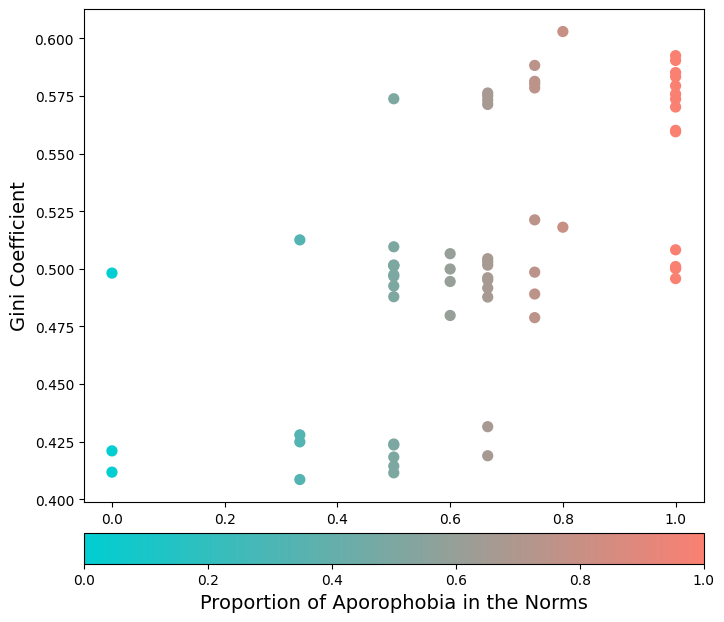

In [26]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pd.DataFrame(sorted_combinations, columns=['combination', 'gini'])
df = df.loc[df['combination'] != '()']

aporophobic_norms = (2, 3, 4, 5, 6)
df['combination'] = df['combination'].apply(ast.literal_eval)  # Convert string to tuple

def calculate_proportion_APO(combination):
    return len(set(combination) & set(aporophobic_norms)) / len(combination)

df['proportion_APO'] = df['combination'].apply(calculate_proportion_APO)

plt.figure(figsize=(8, 8))

# Define custom colormap between 'darkturquoise' and 'salmon'
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_colormap', ['darkturquoise', 'salmon'], N=256)

# Scatter plot with colored points using the custom colormap
plt.scatter(df['proportion_APO'], df['gini'], c=df['proportion_APO'],
            cmap=custom_cmap, marker='o', linestyle='-', s=50)

plt.ylabel('Gini Coefficient', fontsize=14)
#plt.grid(True)  # Enable the grid

cbar = plt.colorbar(orientation='horizontal', pad=0.05)  # Add colorbar
cbar.set_label('Proportion of Aporophobia in the Norms', fontsize=14)  # Adjust the label size here
plt.show()


## Distribution of actions

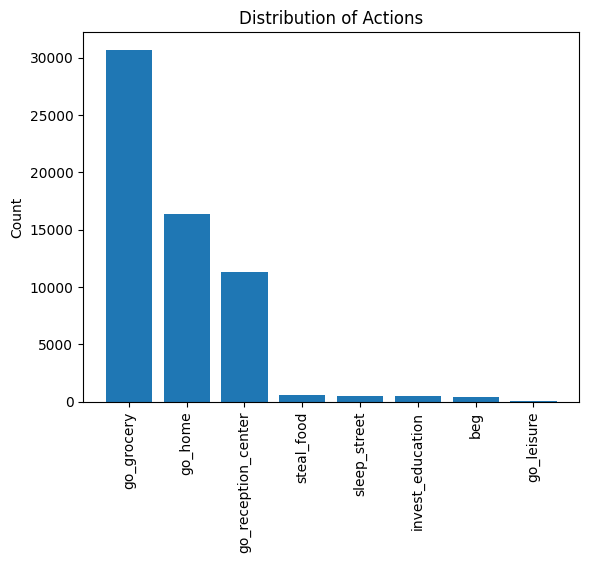

In [28]:

import matplotlib.pyplot as plt
import pandas as pd
import ast
#DISTRIBUTION OF ACTIONS
cluster = cluster.dropna(subset=["actions"])
# Calculate value counts
action_counts = cluster["actions"].value_counts()
plt.bar(action_counts.index, action_counts.values)
plt.ylabel("Count")
plt.title("General Distribution of Actions")
plt.xticks(rotation=90)
plt.show()

C:\Users\albaa\AppData\Local\Temp\ipykernel_19844\31245276.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
C:\Users\albaa\AppData\Local\Temp\ipykernel_19844\31245276.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)


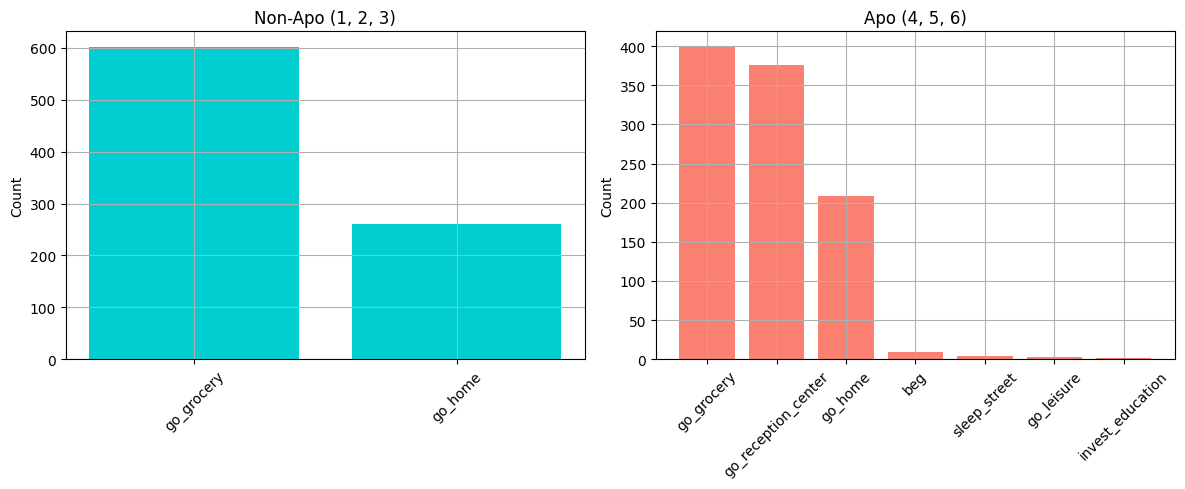

go_grocery             399
go_reception_center    376
go_home                208
beg                      9
sleep_street             4
go_leisure               3
invest_education         1
Name: actions, dtype: int64

In [30]:
import matplotlib.pyplot as plt
import numpy as np

desired_order = ['(0, 1, 5)', '(2, 3, 4)']
combination_labels = ['Non-Apo (1, 2, 3)', 'Apo (4, 5, 6)']
filtered_cluster = cluster[cluster['norms_ind'].isin(desired_order)]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
colors = ['darkturquoise', 'salmon']

# Iterate over the desired combinations and plot the histogram for each one
for i, combination in enumerate(desired_order):
    # Filter the DataFrame for the current combination
    filtered_data = filtered_cluster[filtered_cluster['norms_ind'] == combination]
    
    # Compute the value counts of actions
    action_values = filtered_data['actions'].value_counts()
    
    # Plot the histogram of actions for the current combination
    axs[i].bar(action_values.index, action_values.values, color=colors[i])
    axs[i].grid()
    #axs[i].set_xlabel('Actions')
    axs[i].set_ylabel('Count')
    axs[i].set_title(combination_labels[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()
cluster[cluster['norms_ind'] =='(0, 1, 5)']['actions'].value_counts()
cluster[cluster['norms_ind'] =='(2, 3, 4)']['actions'].value_counts()

The actions variability is really poor for the Non-Apo norm combination. 